In [2]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

# Conclusion

Multiple waves confirm that the directories can't migrate fast enough for clients to switch over. After a brief pause, the client eventually get load balanced across MDSs. One of the problems exhibited with multiple clients is that the parent `/seqdir` directory also gets migrated; we can solve this by not making the directory hierarchy too deep. 

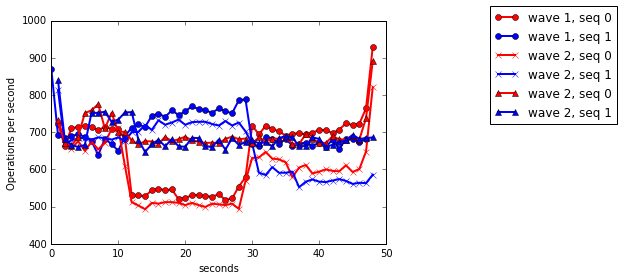

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

s = sum_throughput(glob.glob("mantle-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='o', linewidth=2.0, label="wave 1, seq 0")

s = sum_throughput(glob.glob("mantle-back*.csv"))
ax.plot(range(-1, len(s['rate']) - 1), s['rate'], 
        'b-', marker='o', linewidth=2.0, label="wave 1, seq 1")

s = sum_throughput(glob.glob("mantle-2nd-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='x', linewidth=2.0, label="wave 2, seq 0")

s = sum_throughput(glob.glob("mantle-2nd-background-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'b-', marker='x', linewidth=2.0, label="wave 2, seq 1")

s = sum_throughput(glob.glob("mantle-3nd-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'r-', marker='^', linewidth=2.0, label="wave 3, seq 0")

s = sum_throughput(glob.glob("mantle-3nd-background-issdm*.csv"))
ax.plot(range(0, len(s['rate'])), s['rate'], 
        'b-', marker='^', linewidth=2.0, label="wave 3, seq 1")

ax.set_xlabel("seconds")
ax.set_ylabel("Operations per second")
#ax.set_ylim(0, 2000)
#ax.set_ylim(500, 700)
#ax.set_xlim(0, 50)
lgd = ax.legend(loc='center', bbox_to_anchor=(1.5, 0.8))